# Mini-lab 7: Transportation forecasting with kNN

As in mini-lab 6 we will analyze mode choice as a function of delta_travel_time, and delta_travel_cost, the difference in travel time and cost between the transit travel option and the driving travel option. In this mini-lab we will build a method to predict the travel mode for a trip based on the travel mode of the "nearest neighbors". 

### k nearest neighbors algorithm:
The [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a popular classification technique in computer science. In this mini-lab we will build a classifier that predicts the travel mode for unobserved trips based on the travel mode of the nearest neighbors. Here, the nearest neighbors are the observation with the most similar delta_travel_time and delta_travel_cost.

### The dataset
The dataset is the same as we used in Mini-lab 6. It contains the actual travel decisions for travelers given various travel alternatives. Below is the detailed dataset description.
#### "The California Department of Transportation (Caltrans) conducts the California Household Travel Survey (CHTS) every ten years to obtain detailed information about the socioeconomic characteristics and travel behavior of households statewide." -[Caltrans website](http://www.dot.ca.gov/hq/tpp/offices/omsp/statewide_travel_analysis/chts.html)


The modechoice.csv file contains data from the CHTS on trips that people living in the bay area actually took. The dataset contains demographic info on the traveler as well as trip origin taz and destination taz. We have combined this data with the inter TAZ travel time/cost data that we used in mini-labs 4 and 5 to provide information on trip cost, time, and distance for all available travel modes.

Note that for some trips/some people, not all modes are available. Some people do not have a drivers license or do not have access to a car. Sometimes biking is infeasible due to bike ownership, trip distance or restrictions on biking across bridges. 

The data in modechoice.csv is as follows:
<table>
    <tr>
        <td>'observation_id'</td>   <td>int id</td>
    </tr><tr>
        <td>'choice'        </td>   <td>  string mode chosen <li>'drive_alone' - drive alone,<li>'shared_ride_2' - 2 person shared ride,<li>'shared_ride_3' - 3 person shared ride,<li>'walk_transit_walk' - walk tranit walk,<li>'drive_transit_walk' - drive transit walk,<li>'walk_transit_drive' - walk transit drive,<li>'walk' - walk,<li>'bike' - bike </td>
    </tr><tr>
    <td> 'availability_drive_alone'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_2'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_shared_ride_3+'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_drive_transit_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk_transit_drive'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_walk'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'availability_bicycle'</td>   <td>1 if available else 0</td>
    </tr><tr>
    <td> 'household_id'</td>   <td>      int
    </tr><tr>
    <td> 'person_id'</td>   <td>              int
    </tr><tr>
    <td> 'tour_id'</td>   <td>                 int
    </tr><tr>
    <td> 'tour_origin_taz'</td>   <td>                   int taz id
    </tr><tr>
    <td> 'primary_dest_taz'</td>   <td>    int taz id
    </tr><tr>
    <td> 'age'</td>   <td>          int age in years
    </tr><tr>
    <td> 'household_size'</td>   <td>                       int, number of people
    </tr><tr>
    <td> 'household_income'</td>   <td>    int 1-8, 1 = lowest income bracket, 8=highest
    </tr><tr>
    <td> 'household_income_values'</td>   <td>         int dollar value household income
    </tr><tr>
    <td> 'transit_subsidy'</td>   <td>   1 if has subsidy, else 0
    </tr><tr>
    <td> 'transit_subsidy_amount'</td>   <td>           subsidy dollar amount
    </tr><tr>
    <td> 'cross_bay'</td>   <td>    1 if trip crosses bay, else 0
    </tr><tr>
    <td> 'total_travel_time_drive_alone'</td>   <td>    door to door travel time in minutes
    </tr><tr>
    <td> 'total_travel_time_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_time_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_drive_alone' </td>   <td> travel distance in miles
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_2'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_walk'     </td>   <td> 
    </tr><tr>
    <td> 'total_travel_distance_bicycle'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_alone'</td>   <td> travel cost in dollars
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_2'</td>   <td> Note driving costs include fixed per mile rate divided evenly among passengers, and tolls. Does not include parking and other car ownership related costs
    </tr><tr>
    <td> 'total_travel_cost_shared_ride_3+'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_drive_transit_walk'</td>   <td> 
    </tr><tr>
    <td> 'total_travel_cost_walk_transit_drive'</td>   <td> 
    </tr><tr>
    <td> 'age_ctgry'         <td>  str age category:
                                       <li>'0-04' = 0-4 years old,
                                       <li>'05-19' = 5-19 years old, 
                                       <li>'20-44' = 20-44 years old, 
                                       <li>'45-64' = 45-64 years old, 
                                       <li>'65+' = 65+ years old, 




In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc = Table.read_table('../minilab6/modechoice.csv')
mc

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry
1,drive_alone,1,1,1,1,1,1,1,1,1043613,1,0,1004,969,53,2,6,87500,0,-1,0,20.97,20.97,20.97,83.56,63.05,67.29,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,45-64
2,drive_alone,1,1,1,1,1,1,1,1,1043613,1,1,1004,969,53,2,6,87500,0,-1,0,22.16,22.16,22.16,87.38,77.79,58.01,167.6,41.9,9.1,9.1,9.1,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,45-64
3,shared_ride_2,1,1,1,1,1,1,0,0,1045607,1,0,908,116,57,1,4,42500,0,-1,1,47.98,47.98,47.98,140.63,131.49,137.39,nan,nan,31.94,31.94,31.94,nan,nan,9.1125,5.2071,3.645,6.95,7.75,5.98,45-64
4,bike,0,1,1,1,0,1,1,1,1049908,1,0,30,12,50,1,2,17500,0,-1,0,nan,15.05,15.05,26.46,nan,16.77,42.8,10.7,nan,2.23,2.23,2.14,2.14,nan,0.2355,0.1649,3.22,nan,3.22,45-64
5,walk,0,1,1,1,0,1,1,1,1049908,1,1,30,9,50,1,2,17500,0,-1,0,nan,11.72,11.72,43.86,nan,28.89,19.2,4.8,nan,0.96,0.96,0.96,0.96,nan,0.1014,0.071,3.22,nan,3.22,45-64
6,shared_ride_2,1,1,1,1,1,1,1,1,1051388,2,0,89,4,48,3,7,125000,0,-1,0,26.32,26.32,26.32,42.1,55.48,58.48,143.2,35.8,7.4,7.4,7.4,7.16,7.16,1.3675,0.7815,0.547,3.22,3.98,3.22,45-64
7,drive_alone,1,1,1,1,1,1,1,1,1051388,2,1,89,23,48,3,7,125000,0,-1,0,32.07,32.07,32.07,86.89,91.7,83.35,184.8,46.2,9.47,9.47,9.47,9.24,9.24,1.7501,1,0.7,3.22,3.22,3.22,45-64
8,shared_ride_3,1,1,1,1,1,1,1,1,1051388,3,0,89,71,10,3,7,125000,0,-1,0,16.58,16.58,16.58,53.32,46.76,46.77,94,23.5,4.7,4.7,4.7,4.7,4.7,0.8686,0.4964,0.3474,3.22,3.22,3.22,05-19
9,walk_transit_walk,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,45-64
10,walk,1,1,1,1,1,1,1,1,1093539,1,0,90,111,56,3,8,175000,1,999998,0,33.13,33.13,33.13,100.65,100.39,100.39,192.4,48.1,9.86,9.86,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,45-64


## Drive vs. transit travel time comparison

As in mini-lab 6: first we take trips where both drive and transit are available, we compute the delta_travel_time and delta_travel_cost for trips where choice = transit and where choice = drive. These steps should have been completed in mini-lab 6, but the code to do this is copied below:

In [3]:
# Get rows where both drive and walk to transit are available
transit_drive_avail = mc.where('availability_drive_alone',1).where('availability_walk_transit_walk',1)

# From transit_drive_avail, store the rows where the mode 'choice' is 'walk_transit_walk'
# in a table called took_transit
took_transit = transit_drive_avail.where('choice','walk_transit_walk')

# from transit_drive_avail, store the rows where the selected mode 'choice' is 'drive_alone'
drove = transit_drive_avail.where('choice','drive_alone')


# Compute the difference in travel time (the 'total_travel_time_walk_transit_walk' column-
# the 'total_travel_time_drive_alone' column) for people who took transit.
chose_wtw_tt_delta = (took_transit.column('total_travel_time_walk_transit_walk')-
                      took_transit.column('total_travel_time_drive_alone'))

# Compute the difference in travel time (the 'total_travel_time_walk_transit_walk' column-
# the 'total_travel_time_drive_alone' column) for people who drove.
chose_drive_tt_delta = (drove.column('total_travel_time_walk_transit_walk')-
                        drove.column('total_travel_time_drive_alone'))

# Compute the cost delta for transit cost vs. drive alone cost for people who took tranist
chose_wtw_cost_delta = (took_transit.column('total_travel_cost_walk_transit_walk')
                        -took_transit.column('total_travel_cost_drive_alone'))

# Compute the cost delta for transit cost vs. drive alone cost for people who drove
chose_drive_cost_delta = (drove.column('total_travel_cost_walk_transit_walk')
                          -drove.column('total_travel_cost_drive_alone'))

# Building a classifier
## 0. Visualizing the data
The first step when we start building a predictive model is to visualize the data. We already created this scatter plot in mini-lab 6, but I am including it here to remind us of what the data set looks like.

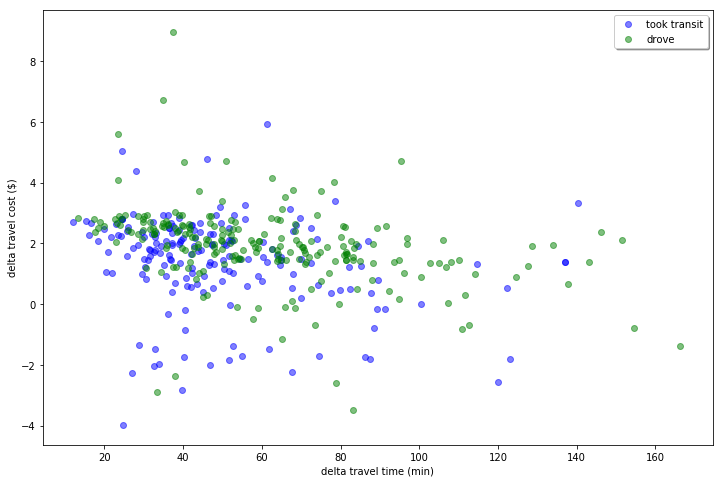

In [4]:
plt.figure(figsize=(12,8))

plt.scatter(chose_wtw_tt_delta, chose_wtw_cost_delta, color='blue', 
            alpha=.5, label = 'took transit')

plt.scatter(chose_drive_tt_delta, chose_drive_cost_delta, color='green', alpha=.5, label = 'drove')

plt.xlabel('delta travel time (min)')
plt.ylabel('delta travel cost ($)')
plt.legend(shadow=True)


## 1. Build the input data table
First we need to build a table that contains the response variable (the thing we want to predict - in this case, whether someone will drive or not), and the inputs that will be used to predict the response variable (in this case delta_travel_time and delta_travel_cost). 

In [5]:
input_table = Table().with_columns('transit_time-drive_time', chose_drive_tt_delta,
                                   'transit_cost-drive_cost', chose_drive_cost_delta,
                                   'choice=drive',1)

transit_input_table = Table().with_columns('transit_time-drive_time', chose_wtw_tt_delta,
                                           'transit_cost-drive_cost', chose_wtw_cost_delta,
                                           'choice=drive',0)
input_table.append(transit_input_table)

transit_time-drive_time,transit_cost-drive_cost,choice=drive
62.59,4.1583,1
65.22,3.1483,1
54.82,1.4699,1
26.79,2.3866,1
41.49,2.5436,1
57.78,2.004,1
94.82,0.1838,1
13.38,2.8282,1
68.36,2.394,1
32.56,2.2979,1


## 2. Normalize the data.
If the input data columns are all in the same units, then we're good to go, but if they are in different units, i.e one column contains travel time in minutes and another column contains travel cost in dollars, a distance measure doesn't make a lot of sense. Instead we normalize the data and for every column. The "units" of the normalized data is how many standard deviations the data point is from the mean. I have built a norm() helper function to normalize the data. Later we will use the transform function to modify a new point that we want to predict in the same that we have modified the other points.

In [6]:
def norm(data):
    x_minus_mean = data - np.mean(data)
    x_norm = x_minus_mean/np.std(data)
    return x_norm

def transform(to_predict, data):
    return (to_predict - np.mean(data))/np.std(data)

input_table = input_table.with_columns("normed_transit_time-drive_time", 
                        norm(input_table.column(0)),
                        "normed_transit_cost-drive_cost",
                         norm(input_table.column(1)))
# Your task: Create two new columns in the table, one called 'normed_transit_time-drive_time', 
# another called 'normed_transit_cost-drive_cost'. The values in these two columns should be
# the normalized values of 'transit_time-drive_time' and 'transit_cost-drive_cost'. Use the
# norm function above to help you out:
input_table


transit_time-drive_time,transit_cost-drive_cost,choice=drive,normed_transit_time-drive_time,normed_transit_cost-drive_cost
62.59,4.1583,1,0.23162,1.73266
65.22,3.1483,1,0.327507,1.03031
54.82,1.4699,1,-0.0516645,-0.136824
26.79,2.3866,1,-1.0736,0.500638
41.49,2.5436,1,-0.53766,0.609813
57.78,2.004,1,0.0562536,0.234582
94.82,0.1838,1,1.40669,-1.03116
13.38,2.8282,1,-1.56252,0.807721
68.36,2.394,1,0.441988,0.505783
32.56,2.2979,1,-0.863237,0.438957


A bell curve with standard deviations as x-axis unit

<img src = "Normalization.png" width ='600'>

## 3. Build a classifier
### 3a. We have decided to use k-Nearest Neighbor (kNN) algorithm. 
Below I have built a basic kNN class with two methods, a fit method where we load in the nearest neighbor candidates, and a predict method, where we identify the nearest neighbors and return the most common response category among the nearest neighbors.


### 3b. Determine a distance function
Since we need to identify the nearest neighbors, we first need to choose a distance function. In this case we will use a euclidean distance function.



### A primer for K_NN classification 
Explained by Data 8 project 3, fall 2017: <br>
"K-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*."

### A primer for class in python
Explained by Python's offical description: <br>

"Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state."

### Remember: Abstraction
You don't need to understand how a function does what it does. You just need to understand what arguments the function take, and what will it return

### What we're looking for
In this case, we're using: <br> a) the delta travel cost <br> b) delta travel time <br> to predict <br> c) the travel mode of an individual

In [7]:
def distance(x, y):
    return np.sqrt(np.sum((x-y)**2,1))

class KNearestNeighbors():
    def __init__ (self, n_neighbors=5):
        '''
        n_neighbors: number of neighbors
        '''
        self.n_neighbors = n_neighbors
    
    def fit(self, input_data, response):
        '''
        input_data: a table, the values of this table will be used to 
            compute the distance to the neighbors
        response: a table with one column, the values in this column 
            represent the category of the thing we are trying to predict 
        '''
        self.input_data = input_data.values
        self.response = response.values.flatten()
    
    def predict(self, to_predict, return_kneighbor_inds=True):
        '''
        to_predict: A single input data point. It should contain one value 
           for each of the columns in the input_data table.
        return_kneighbor_inds: boolean. If True, return the indices of the
            nearest neighbors from the input table, otherwise, only the 
            majority category of the k-nearest neighbors is returned.
        '''
        
         #get distance input_data to predict"
        dists = distance(to_predict, self.input_data)

        #get indices of k nearest points
        inds = np.argsort(dists)[0:self.n_neighbors]

        #return the most common response among the neighbors
        most_common_response = (np.argmax(np.bincount(self.response[inds])))
        if return_kneighbor_inds:
            return most_common_response, inds
        return most_common_response
            

## 4.1 find the k-nearst neighbors using the classifier

In [8]:
# Your task: Use the input_table.select() method to select only the columns 
# to be used to determine the nearest neighbors
input_data = input_table.select('normed_transit_time-drive_time','normed_transit_cost-drive_cost')


# Your task: Use the input_table.select() method to select the column with the response variable
response = input_table.select("choice=drive")

# Your task: Create an instance of the KNearestNeighbors class, let's set n_neighbors to 5.
KNN = KNearestNeighbors()


# Your task: Load in the nearest neighbor candidates using the fit method:
KNN.fit(input_data, response)


# Set to_predict =[25,1.5] This means we are predicting the travel mode of a trip with 
# delta_travel_time = 25 min, delta_travel_cost = 1.5
to_predict = [25,1.5]


#transform the first element of this point to find out how many standard deviations 
#the delta_travel_time is from the mean. Do the same for delta_travel_cost
normed_to_predict = [transform(to_predict[0],input_table['transit_time-drive_time']),
                     transform(to_predict[1],input_table['transit_cost-drive_cost'])]
print("The to_predict point, in standard units, is ")
print()
print(normed_to_predict[0], " SDs away from the mean of delta travel time", "and ")
print(normed_to_predict[1], " SDs away from the mean of delta travel cost")
print()

prediction, nn_inds = KNN.predict(normed_to_predict, True)
predicted_travel_mode = 'drive' if prediction ==1 else 'take transit'

print ('Based on the k nearest neighbors, the predicted travel mode is %s' %predicted_travel_mode)

The to_predict point, in standard units, is 

-1.1388657199850651  SDs away from the mean of delta travel time and 
-0.11589308632302903  SDs away from the mean of delta travel cost

Based on the k nearest neighbors, the predicted travel mode is take transit


### Verify results
Make sure we are actually locating the nearest neighbors. In the cell below we use the Table take() method to see which rows have been identied as nearest neighbors. Take a look at the values and confirm that they are similar to the values of the to_predict point. 

In [9]:
nn_to_plot = input_table.take[nn_inds]
nn_to_plot

transit_time-drive_time,transit_cost-drive_cost,choice=drive,normed_transit_time-drive_time,normed_transit_cost-drive_cost
25.81,1.5818,0,-1.10933,-0.0590104
30.01,1.494,0,-0.956207,-0.120065
21.05,1.7231,0,-1.28288,0.0392479
31.12,1.4673,0,-0.915738,-0.138632
31.58,1.5826,0,-0.898967,-0.0584541


## 4.2 Bonus: Find the k_nearest_neighbors using sort
We can solve the same problem by using the basic sort functionality of the table as well. This process will be more familiar to those with data 8 background

In [20]:
#define a new distance function that can calculate 
def distance_by_columns(x, y, table):
    """Takes in the x and y coordinate of the to_predict point and a table with 
    two columns of normalized travel time and travel cost. Return the normalized
    distance between each point in the table and to_predict
    """
    distances = []
    for i in np.arange(table.num_rows):
        distances.append(np.sqrt((x-table.column(0).item(i))**2 + (y-table.column(1).item(i))**2))
    return distances

dists = distance_by_columns(normed_to_predict[0], normed_to_predict[1], input_table.select(3,4))
#Creates a new table with the normalized distance attached
input_distance = input_table.with_column("normalized distance", dists)
input_distance

transit_time-drive_time,transit_cost-drive_cost,choice=drive,normed_transit_time-drive_time,normed_transit_cost-drive_cost,normalized distance
62.59,4.1583,1,0.23162,1.73266,2.30117
65.22,3.1483,1,0.327507,1.03031,1.86119
54.82,1.4699,1,-0.0516645,-0.136824,1.0874
26.79,2.3866,1,-1.0736,0.500638,0.619975
41.49,2.5436,1,-0.53766,0.609813,0.942389
57.78,2.004,1,0.0562536,0.234582,1.24545
94.82,0.1838,1,1.40669,-1.03116,2.7051
13.38,2.8282,1,-1.56252,0.807721,1.01614
68.36,2.394,1,0.441988,0.505783,1.6987
32.56,2.2979,1,-0.863237,0.438957,0.61954


In [21]:
#Sort the table by normalized distances
sorted_by_distance = input_distance.where(0, are.between(15, 35)).where(1, are.between(0, 3)).sort("normalized distance")

#pick the five closest points
chosen_five = sorted_by_distance.take(np.arange(5))

Verify that these are the same five neighbors as we found earlier

In [22]:
chosen_five

transit_time-drive_time,transit_cost-drive_cost,choice=drive,normed_transit_time-drive_time,normed_transit_cost-drive_cost,normalized distance
25.81,1.5818,0,-1.10933,-0.0590104,0.0640918
30.01,1.494,0,-0.956207,-0.120065,0.182706
21.05,1.7231,0,-1.28288,0.0392479,0.21168
31.12,1.4673,0,-0.915738,-0.138632,0.224284
31.58,1.5826,0,-0.898967,-0.0584541,0.246679


### A statistical side note

One important note: normalizing a dataset **does not** change the distribution of data. See the histogram and scatter plots below and observe that the shape doesn't change before and after normalization

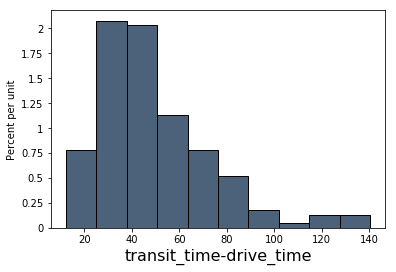

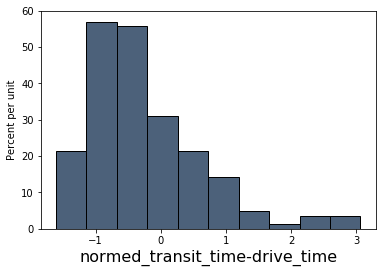

In [13]:
input_table.where("choice=drive", 0).hist('transit_time-drive_time')
input_table.where("choice=drive", 0).hist('normed_transit_time-drive_time')

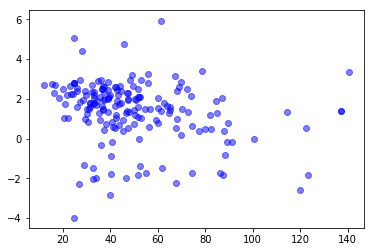

In [14]:
before_normalize_tt = input_table.where("choice=drive", 0).column('transit_time-drive_time')
before_normalize_c = input_table.where("choice=drive", 0).column('transit_cost-drive_cost')

plt.scatter(before_normalize_tt, before_normalize_c, color='blue', 
            alpha=.5, label = 'took transit')

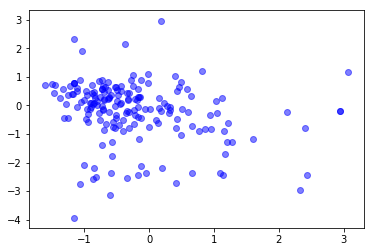

In [15]:
after_normalize_tt = input_table.where("choice=drive", 0).column('normed_transit_time-drive_time')
after_normalize_c = input_table.where("choice=drive", 0).column('normed_transit_cost-drive_cost')

plt.scatter(after_normalize_tt, after_normalize_c, color='blue', 
            alpha=.5, label = 'took transit')

## 5. Visualize the nearest neighbors
Below is the same scatter poing that we plotted above, but now we have added a black dot for the to_predict point, and added red circles to identify the nearest neighbors to the observed point.

In [23]:
#We normalize the delta travel time and delta travel cost here for both driving and transit
normed_wtw_tt =input_table.where("choice=drive", 0).column('normed_transit_time-drive_time')
normed_wtw_c = input_table.where("choice=drive", 0).column('normed_transit_cost-drive_cost')
normed_drive_tt = input_table.where("choice=drive", 1).column('normed_transit_time-drive_time')
normed_drive_c = input_table.where("choice=drive", 1).column('normed_transit_cost-drive_cost')

This piece of code will produce the plot. To zoom in further, turn the last comment into code:

(-1.8943168842453026, 4.312120297987867, -4.38428750488569, 5.580122618374558)

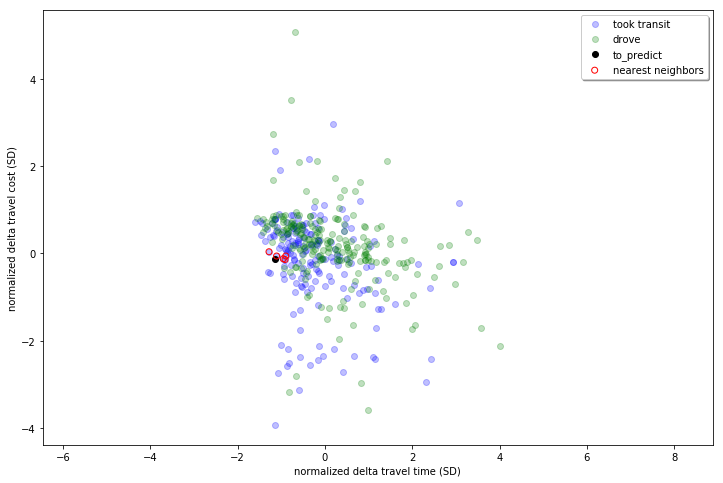

In [24]:
nn_to_plot = input_table.take[nn_inds]

plt.figure(figsize=(12,8))

plt.scatter(normed_wtw_tt, normed_wtw_c, color='blue', 
            alpha=.25, label = 'took transit')

plt.scatter(normed_drive_tt, normed_drive_c, color='green', 
            alpha=.25, label = 'drove')

plt.scatter(normed_to_predict[0],normed_to_predict[1], color='black', label = 'to_predict')

plt.scatter(chosen_five.column('normed_transit_time-drive_time'), chosen_five.column('normed_transit_cost-drive_cost'), 
            facecolors='none', edgecolors='red', label = 'nearest neighbors')

plt.xlabel('normalized delta travel time (SD)')
plt.ylabel('normalized delta travel cost (SD)')
plt.legend(shadow=True)
plt.axis("equal")

#plt.axis([-1, 1, -1, 1])


# Bonus: visualization of the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary)

Text(0,0.5,'delta travel cost ($)')

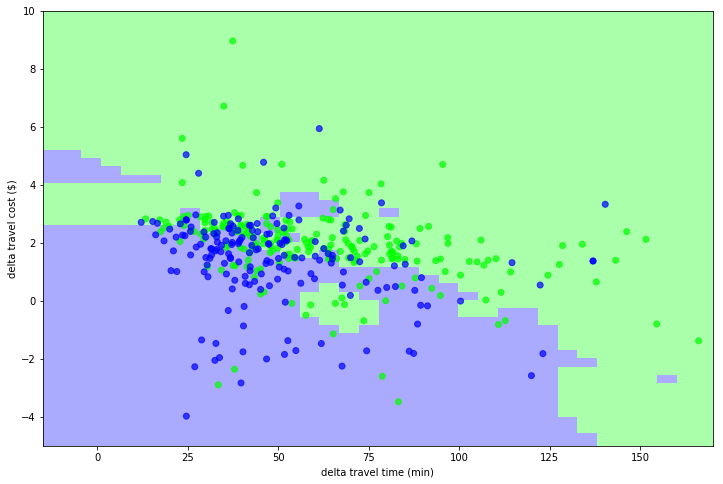

In [25]:
from matplotlib.colors import ListedColormap

kNN = KNearestNeighbors(n_neighbors=10)
kNN.fit(input_data, response)

def untransform(x, data):
    return x*np.std(data)+np.mean(data)


cmap_light = ListedColormap(['#AAAAFF','#AAFFAA'])
cmap_bold = ListedColormap(['#0000FF','#00FF00']) 

plt.figure(figsize=(12,8))   

    
h=.2
X = input_table.select([3,4]).values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z= []
for i in range(len(xx.ravel())):
    Z.append(kNN.predict(np.c_[xx.ravel()[i], yy.ravel()[i]],False))
    
    
Z = np.array(Z).reshape(xx.shape)

plt.pcolormesh(untransform(xx,input_table.select([0]).values), untransform(yy, input_table.select([1]).values), 
               Z, cmap=cmap_light)

plt.scatter(untransform(X[:,0],input_table.select([0]).values), 
            untransform(X[:,1],input_table.select([1]).values), 
            c=response.values.flatten(), facecolors='none',
            cmap=cmap_bold,
            alpha = 0.7)

plt.xlim(-15,170)
plt.ylim(-5,10)

plt.xlabel('delta travel time (min)')
plt.ylabel('delta travel cost ($)')

### Questions:
* What is the kNN predicted travel mode when delta_travel_time = 50, delta_travel_cost = 1.5 when we use... 
 - 1 nearest neighbors to predict travel mode? 
 - 3 nearest neighbors to predict travel mode? 
 - 5 nearest neighbors to predict travel mode? 
 - 10 nearest neighbors to predict travel mode? 
 - 50 nearest neighbors to predict travel mode?



* Describe in words the decision rule (how we decide the travel mode) for k-nearest neighbors when k=1?


* Describe in words the decision rule (how we decide the travel mode) for k-nearest neighbors when k=10?


* For the task of classifying travel mode, do you think it makes more sense to use k=1 or k=10? Why?

In [26]:
# Your answers here
to_predict_2 = [50,1.5]
set_of_nns = [1,3,5,10,50]

for nn in set_of_nns:
    num_nn = KNearestNeighbors(nn)
    num_nn.fit(input_data, response)
    normed_prediction = [transform(to_predict_2[0],input_table['transit_time-drive_time']),
                     transform(to_predict_2[1],input_table['transit_cost-drive_cost'])]
    prediction, nn_inds_2 = num_nn.predict(normed_prediction, True)
    predicted_travel_mode = 'drive' if prediction ==1 else 'take transit'
    print ('Based on',nn,"nearest neighbors, the predicted travel mode is %s" %predicted_travel_mode)

Based on 1 nearest neighbors, the predicted travel mode is take transit
Based on 3 nearest neighbors, the predicted travel mode is take transit
Based on 5 nearest neighbors, the predicted travel mode is drive
Based on 10 nearest neighbors, the predicted travel mode is drive
Based on 50 nearest neighbors, the predicted travel mode is drive
